In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
gold_price = pd.read_csv('./gld_price_data.csv')
print(gold_price.head(5))
print(gold_price.tail())

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099
           Date          SPX         GLD      USO      SLV   EUR/USD
2285   5/8/2018  2671.919922  124.589996  14.0600  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.3700  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033


In [15]:
# tells rows and columns
gold_price.shape

(2290, 6)

In [16]:
# info about the data
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
# tells the number null values in each column
gold_price.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [18]:
# statistical measures of the data
gold_price.describe()
#count is number of data points 
# % values are percentiles

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [20]:
# correlation
correlation= gold_price.corr()


C:\Users\ragha\AppData\Local\Temp\ipykernel_22936\4283114831.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= gold_price.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

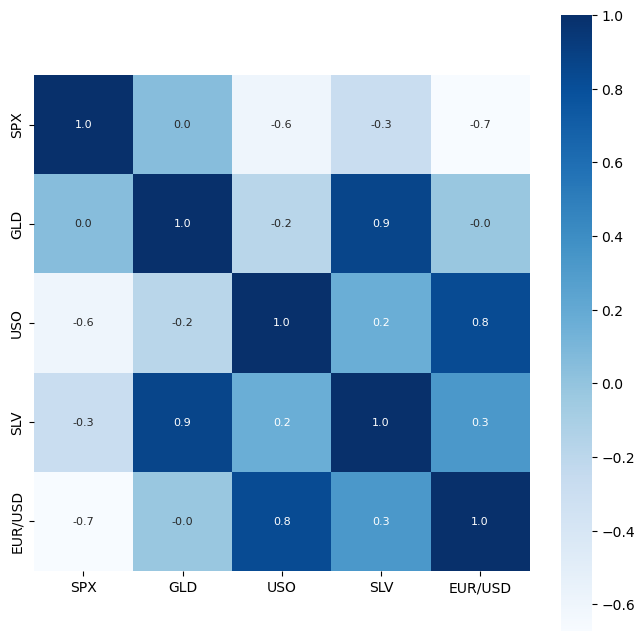

In [29]:
#  heatmap 
plt.figure(figsize= (8,8))
sns.heatmap(correlation,cbar=True,square=True, fmt= '.1f',annot=True,annot_kws={'size':8}, cmap= 'Blues')

In [31]:
# correlation values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\ragha\AppData\Local\Temp\ipykernel_22936\1670125979.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_price['GLD'],color='green' )


<Axes: xlabel='GLD', ylabel='Density'>

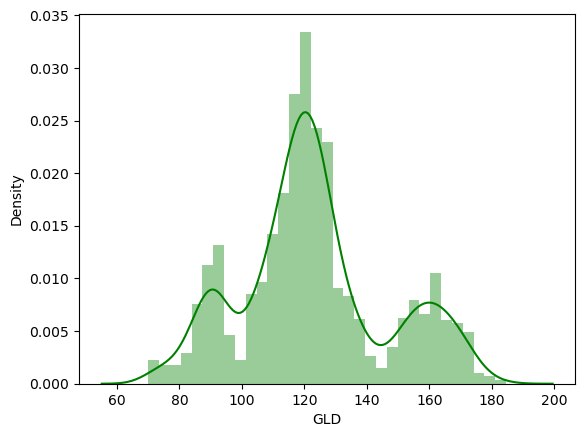

In [33]:
# checking the distribution of gld price
sns.distplot(gold_price['GLD'],color='green' )

In [35]:
# splitting the features and target

X= gold_price.drop(['Date','GLD'],axis=1)
Y= gold_price['GLD']

In [36]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [37]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [38]:
# splitting into training as well as test data

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)


In [39]:
# model training Random forest 
regressor= RandomForestRegressor(n_estimators=100)


In [41]:
# training the model 
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [42]:
# Model evaluation by prediction
test_data_prediction= regressor.predict(X_test)



In [43]:
print(test_data_prediction)

[168.60519959  82.15359985 116.19540036 127.70100058 120.71660153
 154.53839733 150.35199856 126.13280072 117.35679901 125.84290116
 116.78760119 171.74470061 141.7515984  167.83319866 114.9339003
 117.92100052 137.93230331 169.99180062 159.72800244 157.32359841
 155.09869985 125.79739988 176.25699961 156.94450274 125.21160062
  93.91099977  77.5441003  120.90380005 118.9893988  167.42200059
  88.21450059 125.15920012  91.28710129 117.60470038 121.21509905
 136.09280081 115.50460061 115.20540039 147.95499987 107.13530128
 104.53220256  87.11919792 126.52660071 117.5602002  152.74099889
 119.54580007 108.33989989 107.90229793  93.27550063 127.08049777
  75.14920019 113.6122995  121.18270034 111.32569914 118.9975986
 120.83289931 158.69630029 169.54830125 147.00369675  85.83499866
  94.36330023  86.75609877  90.46590013 119.07890076 126.46630069
 127.74980001 168.43219935 122.21349931 117.43269929  98.60110029
 167.96280068 143.48899906 131.76210234 121.28100214 120.6373993
 119.67520063

In [46]:
# R squared error

error_score= metrics.r2_score(Y_test,test_data_prediction)

In [49]:
print(error_score)

0.9886412339396131


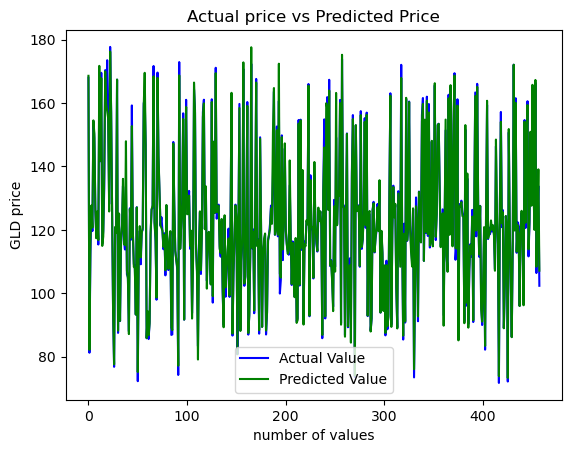

In [51]:
# Y_test is in dataframe
Y_test= list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction,color='green', label='Predicted Value')
plt.title('Actual price vs Predicted Price')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()